In [14]:
import torch 
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import optim


transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize([0.5], [0.5])
                               ])
trainset = datasets.FashionMNIST('~/.pytorch/Fashion-MNIST/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/Fashion-MNIST/', download=True, train=False, transform=transform)



trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle=True)

images, labels = next(iter(trainloader))
plt.imshow(images[9,:].view(28,28), cmap='gray')

In [51]:
model = nn.Sequential(nn.Linear(28*28,128), 
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 32),
                     nn.ReLU(), 
                     nn.Linear(32, 10), 
                     nn.LogSoftmax(dim=1))

criterion= nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss: {running_loss/len(trainloader)}")
        





Training Loss: 2.1698678087578145
Training Loss: 1.4719291941316397
Training Loss: 0.884523957459403
Training Loss: 0.7029079677962037
Training Loss: 0.6457178796659401


Text(0.5, 1.0, 'Correct label : 5, Predicted label : 5')

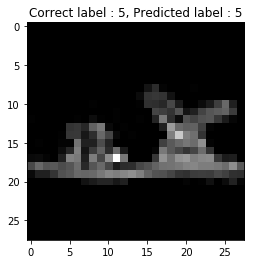

In [125]:
images, labels = next(iter(testloader))



idx = 5

image = images[idx]
with torch.no_grad():
    logps = model(images[idx].view(1, -1))
    ps = torch.exp(logps)

plt.imshow(image.view(28, 28), cmap='gray')        
plt.title("Correct label : " + str(labels[idx].item()) + ", Predicted label : "+ str(torch.argmax(ps).item()))





